## GRADED CHALLENGE !

Identitas: Engelberta Vania 
Data Science Batch 9

Dataset yang digunakan: List pokemon dengan nama, jenis kekuatan, dan karakter

objective: 
- Menganalisa kemampuan champion
- menghapus kolom yang tidak digunakan, yaitu # dan legendary
- mengetahui banyak champion yang type 1 dan type 2 sama
- mengetahui banyak champion sesuai type 2 melalui bar graphic
- membuat kelompok data type 2, type 1, dan generation
- mengetahui tingkat sebaran 2 type 2 dengan rata-rata kemampuan tertinggi, dibandingkan dengan kemampuannya
- membandingkan kelompok grafik type 1 dan 2 terhadap 6 generation

- Library yang digunakan adalah Numpy dan Pandas.
- Project dinyatakan selesai dan diterima untuk dinilai jika saat dilakukan Run All pada notebook, semua cell berhasil tereksekusi sampai akhir.
- Isi notebook harus mengikuti outline di bawah ini: Perkenalan, Import pustaka yang dibutuhkan, Data Loading, Data Cleaning, Eksplorasi Data, Pengambilan Kesimpulan
- Notebook harus diupload dalam akun GitHub untuk selanjutnya dinilai.

## IMPORT PUSTAKA

In [2]:
# Importing numpy library
# Importing pandas library

import numpy as np                      
import pandas as pd           
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')         

## DATA LOADING

In [3]:
#Loading dataset

df=pd.read_csv('Pokemon.csv')           

In [4]:
#Previewing dataset

df.head()                               

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


This dataset includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is:

- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round

## DATA CLEANING

In [5]:
# Mengganti nama kolom

df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [6]:
# Menghapus kolom Legendary

df.drop(['legendary','#'],axis=1,inplace=True)

In [7]:
#Previewing dataset

df

,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6


In [8]:
# Mengetahui tipe data

df.dtypes

name          object
type_1        object
type_2        object
total          int64
hp             int64
attack         int64
defense        int64
sp._atk        int64
sp._def        int64
speed          int64
generation     int64
dtype: object

In [9]:
# Mengganti tipe data kolom 'name' menjadi string

df['name']=df['name'].astype('string')

In [10]:
#Previewing dataset

df.head()

,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1


In [11]:
#Mengetahui tipe data yang baru dan banyaknya non missing value dari setiap kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        800 non-null    string
 1   type_1      800 non-null    object
 2   type_2      414 non-null    object
 3   total       800 non-null    int64 
 4   hp          800 non-null    int64 
 5   attack      800 non-null    int64 
 6   defense     800 non-null    int64 
 7   sp._atk     800 non-null    int64 
 8   sp._def     800 non-null    int64 
 9   speed       800 non-null    int64 
 10  generation  800 non-null    int64 
dtypes: int64(8), object(2), string(1)
memory usage: 68.9+ KB


In [12]:
#Check any missing value each columns

df.isnull().any()                   

name          False
type_1        False
type_2         True
total         False
hp            False
attack        False
defense       False
sp._atk       False
sp._def       False
speed         False
generation    False
dtype: bool

In [13]:
#total count of missing value

df['type_2'].isnull().sum()         

386

In [14]:
#Mengetahui isi data unique dari kolom Type_2 

df['type_2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [15]:
# mengganti kolom kosong pada type 2 dengan type 1 karena diasumsikan type 1 sama untuk type 2 kolom kosong

df['type_2'].fillna(df['type_1'],inplace=True)

## EKSPLORASI DATA

In [16]:
# mengetahui irisan type 1 dan type 2

pd.crosstab(df['type_1'],df['type_2'], margins=True)

type_2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,All
type_1,,,,,,,,,,,,,,,,,,,
Bug,17,0,0,2,0,2,2,14,1,6,2,0,0,12,0,3,7,1,69
Dark,0,10,3,0,0,2,3,5,2,0,0,2,0,0,2,0,2,0,31
Dragon,0,0,11,1,1,0,1,6,0,0,5,3,0,0,4,0,0,0,32
Electric,0,0,1,27,1,0,1,5,1,1,0,1,2,0,0,0,3,1,44
Fairy,0,0,0,0,15,0,0,2,0,0,0,0,0,0,0,0,0,0,17
Fighting,0,1,0,0,0,20,0,1,0,0,0,0,0,0,3,0,2,0,27
Fire,0,0,1,0,0,7,28,6,0,0,3,0,2,0,2,1,1,1,52
Flying,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,4
Ghost,0,1,2,0,0,0,3,2,10,10,0,0,0,4,0,0,0,0,32


In [17]:
# mengetahui rata-rata setiap kemampuan champion yang diurutkan dari angka tertinggi

df.mean().sort_values(ascending=False).T

total         435.10250
attack         79.00125
defense        73.84250
sp._atk        72.82000
sp._def        71.90250
hp             69.25875
speed          68.27750
generation      3.32375
dtype: float64

/Users/engelbertavania/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type_2', ylabel='count'>

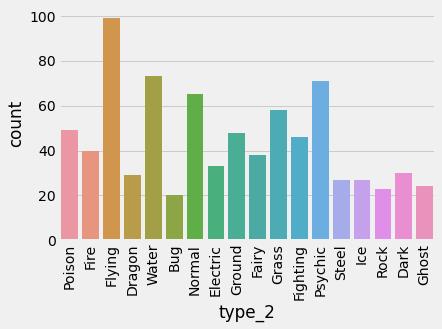

In [18]:
# membuat bar plot type 2 terhadap jumlah

plt.xticks(rotation = 90)
sns.countplot(df['type_2'])

In [19]:
# membuat group berdasarkan type 2, type 1, dan 6 generation

group=df.groupby(['type_2','type_1','generation'])
group.head()

,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6


In [20]:
# mengetahui rata-rata total group

group.mean().sort_values('total').sort_values(by='attack',ascending=False).T

type_2,Fighting,Fire,Dark,Fighting,Dark,Electric,Dark,Fighting,Rock,Ice,...,Fairy,Water,Psychic,Fairy,Psychic,Bug,Fairy,Flying,Fairy,Rock
type_1,Psychic,Ground,Psychic,Bug,Water,Dragon,Rock,Psychic,Ground,Dragon,...,Water,Bug,Ice,Normal,Fire,Bug,Psychic,Water,Normal,Bug
generation,1,3,6,2,1,5,2,4,4,5,...,2,3,2,2,5,6,4,4,3,2
total,780.0,770.0,680.0,550.0,640.0,680.0,650.0,568.0,535.0,686.666667,...,335.0,269.0,305.0,210.0,540.0,206.5,310.0,345.0,190.0,505.0
hp,106.0,100.0,80.0,80.0,95.0,100.0,100.0,68.0,115.0,125.000000,...,85.0,40.0,45.0,90.0,105.0,41.5,20.0,45.0,50.0,20.0
attack,190.0,180.0,160.0,155.0,155.0,150.0,149.0,145.0,140.0,140.000000,...,35.0,30.0,30.0,30.0,30.0,28.5,25.0,20.0,20.0,10.0
defense,100.0,160.0,60.0,95.0,109.0,120.0,130.0,80.0,130.0,93.333333,...,65.0,32.0,15.0,15.0,105.0,50.0,45.0,50.0,40.0,230.0
sp._atk,154.0,150.0,170.0,40.0,70.0,120.0,95.0,65.0,55.0,140.000000,...,40.0,50.0,85.0,40.0,140.0,27.0,70.0,60.0,20.0,10.0
sp._def,100.0,90.0,130.0,100.0,130.0,100.0,110.0,115.0,55.0,93.333333,...,65.0,52.0,65.0,20.0,105.0,27.5,90.0,120.0,40.0,230.0
speed,130.0,90.0,80.0,80.0,81.0,90.0,66.0,95.0,40.0,95.000000,...,45.0,65.0,65.0,15.0,55.0,32.0,60.0,50.0,20.0,5.0


In [21]:
# mengetahui 5 data teratas dari type 2 fighting karena pada informasi sebelumnya diketahui bahwa fighting memiliki kemampuan attck tertinggi

fighting=df.loc[df['type_2']=='Fighting']
fighting.head()

,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation
61,Mankey,Fighting,Fighting,305,40,80,35,35,45,70,1
62,Primeape,Fighting,Fighting,455,65,105,60,60,70,95,1
67,Poliwrath,Water,Fighting,510,90,95,95,70,90,70,1
72,Machop,Fighting,Fighting,305,70,80,50,35,35,35,1
73,Machoke,Fighting,Fighting,405,80,100,70,50,60,45,1


[]

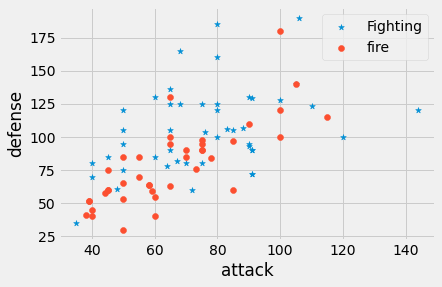

In [22]:
# membuat scater plot tingkat sebaran type fighting dan fire terhadap kemampuan defense dan attack

figthing=df[(df['type_2']=='Fighting')]
fire=df[(df['type_2']=='Fire')]
plt.scatter(fighting.hp,fighting.attack,label='Fighting',marker="*") 
plt.scatter(fire.hp,fire.attack,label="fire")
plt.xlabel("attack")
plt.ylabel("defense")
plt.legend()
plt.plot()

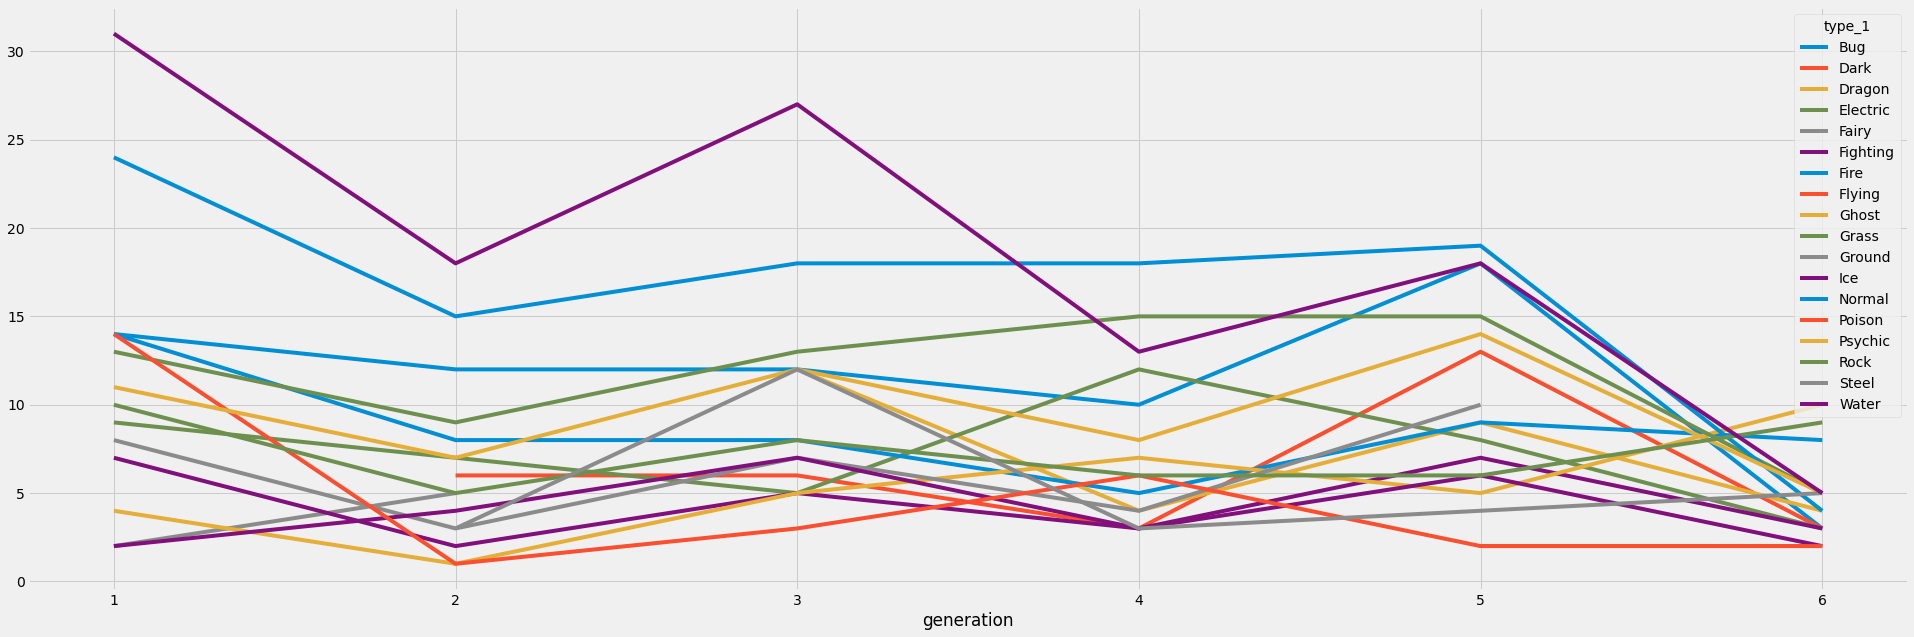

In [25]:
# membuat line plot group type 1

gen_plot1=df.groupby(['generation','type_1']).count().reset_index()
gen_plot1=gen_plot1.pivot('generation','type_1','defense')
gen_plot1.plot()
plt.gcf().set_size_inches(30,10)

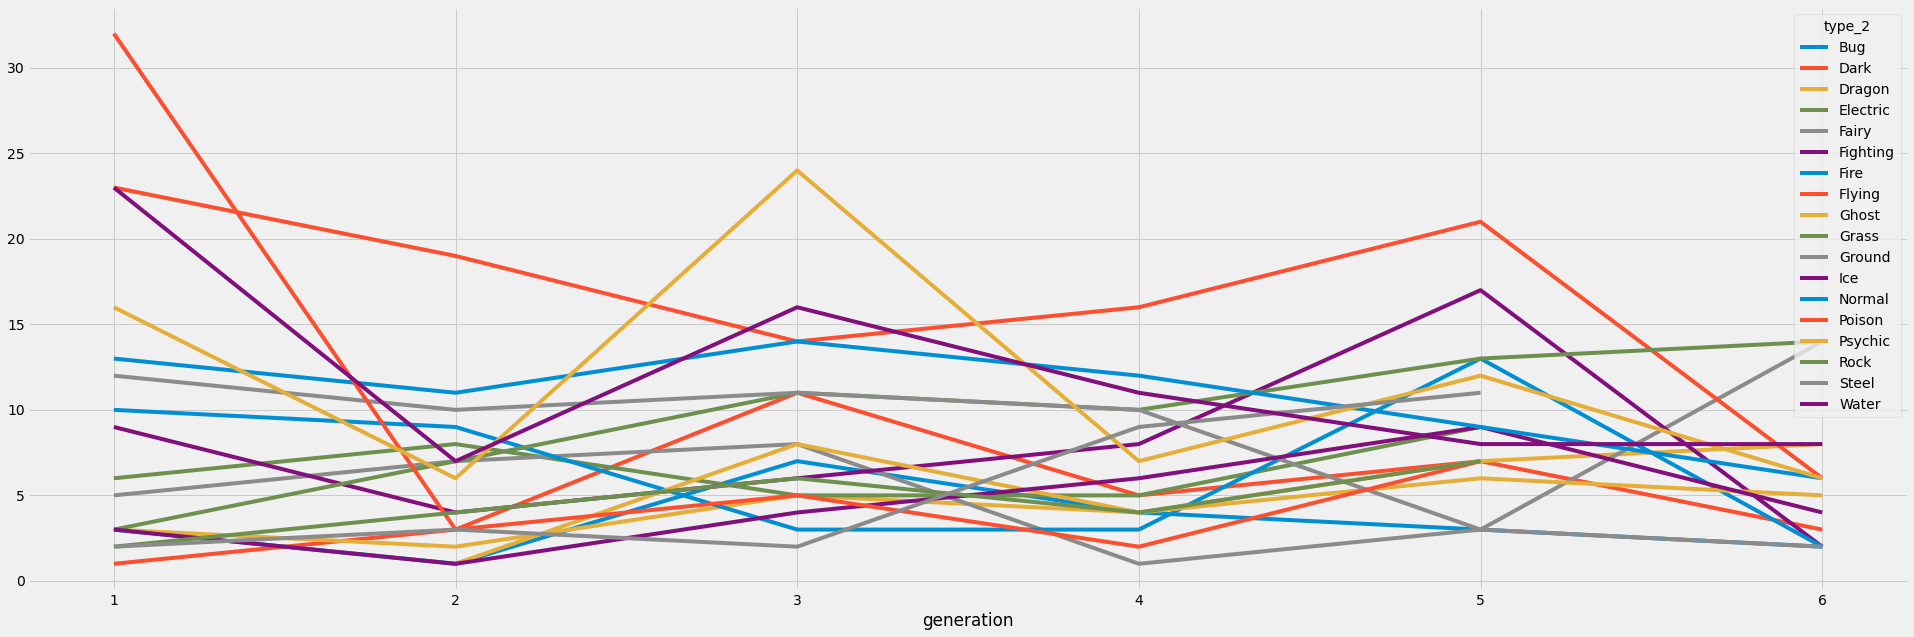

In [27]:
# membuat line plot group type 2

gen_plot2=df.groupby(['generation','type_2']).count().reset_index()
gen_plot2=gen_plot2.pivot('generation','type_2','defense')
gen_plot2.plot()
plt.gcf().set_size_inches(30,10)

## KESIMPULAN

- Banyak Champion yang memiliki type 1 dan type 2 sama dengan angka terbanyak yaitu type water, sebesar 59
- Rata-rata kemampuan tertinggi champion adalah attack dan defense
- Type of champion yang memiliki attack tertingi adalah fighting dan fire
- Type 2 tertinggi adalah flying, dan yanbg terendah adalah bug
- Type fighting dan fire memiliki tingkat sebaran tidak jauh berbeda pada attack dan defense, dapat di asumsikan bahwa kemampuan defense dan attack seimbang. Fire berkecenderungan memiliki kemampuan attack dan fighting cenderung memiliki kemampuan defense.
- Melalui plot group type 1 dengan generation dapat diketahui bahwa type 1 tertinggi pada generation 1-3 adalah fighting. Type bug memiliki jumlah yang cenderung konstan dari generatio 1-4.
- Melalui plot group type 2 dengan generation dapat diketahui bahwa paling bayak type 2 berada di generation pertama. Dark adalah type yang memiliki tingkat sebaran mayoritas tertinggi di setiap generation. Dragon adalah type yang memiliki jumlah terbanyak di generation ke tiga.
- Type 1 dan Type 2 memiliki kesamaan yaitu angka yang cenderung sedikit pada generation ke 6